In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [108]:
df=yf.download('TSLA',start='2010-11-01',end='2021-04-23')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,1.462667,1.516667,1.420667,1.427333,1.427333,6837000
2010-11-02,1.445333,1.458667,1.403333,1.416667,1.416667,4837500
2010-11-03,1.418667,1.500000,1.410667,1.451333,1.451333,5589000
2010-11-04,1.506667,1.688667,1.476667,1.660000,1.660000,28110000
2010-11-05,1.658000,1.664667,1.581333,1.629333,1.629333,15165000
...,...,...,...,...,...,...
2021-04-16,242.883331,249.803329,241.533340,246.593338,246.593338,83938500
2021-04-19,239.866669,241.800003,230.600006,238.210007,238.210007,119058600
2021-04-20,239.139999,245.750000,236.896667,239.663330,239.663330,106827000


In [109]:
def MACD(df):
    df['EMA12']=df.Close.ewm(span=12).mean()
    df['EMA26']=df.Close.ewm(span=26).mean()
    df['MACD']=df.EMA12-df.EMA26
    df['signal']=df.MACD.ewm(span=9).mean()
    print('indicators added')

In [110]:
MACD(df)

indicators added


In [111]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2010-11-01,1.462667,1.516667,1.420667,1.427333,1.427333,6837000,1.427333,1.427333,0.000000,0.000000
2010-11-02,1.445333,1.458667,1.403333,1.416667,1.416667,4837500,1.421556,1.421795,-0.000239,-0.000133
2010-11-03,1.418667,1.500000,1.410667,1.451333,1.451333,5589000,1.433178,1.432408,0.000770,0.000237
2010-11-04,1.506667,1.688667,1.476667,1.660000,1.660000,28110000,1.504777,1.496033,0.008744,0.003119
2010-11-05,1.658000,1.664667,1.581333,1.629333,1.629333,15165000,1.538618,1.526945,0.011673,0.005663
...,...,...,...,...,...,...,...,...,...,...
2021-04-16,242.883331,249.803329,241.533340,246.593338,246.593338,83938500,235.721034,231.622688,4.098347,0.059698
2021-04-19,239.866669,241.800003,230.600006,238.210007,238.210007,119058600,236.103953,232.110637,3.993316,0.846422
2021-04-20,239.139999,245.750000,236.896667,239.663330,239.663330,106827000,236.651550,232.670096,3.981454,1.473428


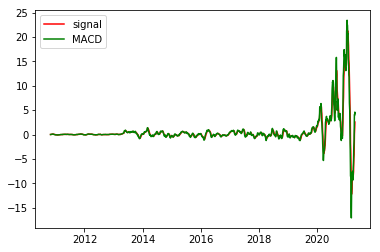

In [112]:
plt.plot(df.signal,label='signal',color='red')
plt.plot(df.MACD,label='MACD',color='green')
plt.legend()

In [113]:
Buy,Sell=[],[]

In [114]:
for i in range(2,len(df)):
    if df.MACD.iloc[i]>df.signal.iloc[i] and df.MACD.iloc[i-1] <df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i]<df.signal.iloc[i] and df.MACD.iloc[i-1]>df.signal.iloc[i-1]:
        Sell.append(i)

In [115]:
Buy

[2,
 48,
 60,
 102,
 119,
 130,
 142,
 166,
 182,
 200,
 208,
 235,
 277,
 301,
 307,
 343,
 353,
 376,
 393,
 404,
 427,
 447,
 467,
 471,
 504,
 558,
 589,
 602,
 669,
 688,
 706,
 726,
 775,
 805,
 823,
 873,
 877,
 892,
 941,
 963,
 989,
 1002,
 1004,
 1042,
 1063,
 1082,
 1100,
 1112,
 1165,
 1185,
 1207,
 1214,
 1259,
 1291,
 1332,
 1362,
 1398,
 1426,
 1480,
 1502,
 1526,
 1534,
 1579,
 1603,
 1634,
 1643,
 1654,
 1692,
 1700,
 1726,
 1748,
 1773,
 1808,
 1839,
 1852,
 1869,
 1906,
 1951,
 1982,
 2005,
 2040,
 2060,
 2077,
 2093,
 2104,
 2114,
 2127,
 2140,
 2161,
 2222,
 2243,
 2250,
 2295,
 2366,
 2411,
 2432,
 2464,
 2504,
 2522,
 2529,
 2550,
 2560,
 2607,
 2620]

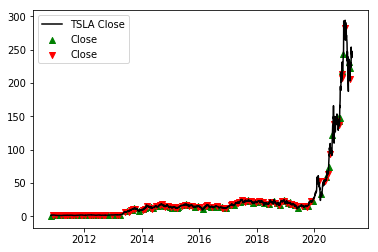

In [116]:
plt.scatter(df.iloc[Buy].index,df.iloc[Buy].Close,marker="^",color='green')
plt.scatter(df.iloc[Sell].index,df.iloc[Sell].Close,marker="v",color='red')
plt.plot(df.Close,label='TSLA Close',color='k')
plt.legend()
plt.show()

In [117]:
Realbuys=[i+1 for i in Buy]
Realsells=[i+1 for i in Sell]

In [118]:
Realbuys,Realsells

([3,
  49,
  61,
  103,
  120,
  131,
  143,
  167,
  183,
  201,
  209,
  236,
  278,
  302,
  308,
  344,
  354,
  377,
  394,
  405,
  428,
  448,
  468,
  472,
  505,
  559,
  590,
  603,
  670,
  689,
  707,
  727,
  776,
  806,
  824,
  874,
  878,
  893,
  942,
  964,
  990,
  1003,
  1005,
  1043,
  1064,
  1083,
  1101,
  1113,
  1166,
  1186,
  1208,
  1215,
  1260,
  1292,
  1333,
  1363,
  1399,
  1427,
  1481,
  1503,
  1527,
  1535,
  1580,
  1604,
  1635,
  1644,
  1655,
  1693,
  1701,
  1727,
  1749,
  1774,
  1809,
  1840,
  1853,
  1870,
  1907,
  1952,
  1983,
  2006,
  2041,
  2061,
  2078,
  2094,
  2105,
  2115,
  2128,
  2141,
  2162,
  2223,
  2244,
  2251,
  2296,
  2367,
  2412,
  2433,
  2465,
  2505,
  2523,
  2530,
  2551,
  2561,
  2608,
  2621],
 [24,
  50,
  94,
  115,
  129,
  135,
  151,
  177,
  185,
  202,
  232,
  268,
  280,
  304,
  334,
  346,
  360,
  381,
  401,
  421,
  434,
  461,
  469,
  480,
  534,
  575,
  596,
  650,
  680,
  701,
  718

In [119]:
Buyprices=df.Open.iloc[Realbuys]
Sellprices=df.Open.iloc[Realsells]

In [120]:
Buyprices

Date
2010-11-04      1.506667
2011-01-11      1.906000
2011-01-28      1.658667
2011-03-30      1.607333
2011-04-25      1.780000
                 ...    
2020-11-18    149.449997
2020-12-18    222.966660
2021-01-05    241.220001
2021-03-15    231.363327
2021-04-01    229.456665
Name: Open, Length: 104, dtype: float64

In [121]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices=Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1]>Sellprices.index[-1]:
    Buyprices=Buyprices.drop(Buyprices.index[-1])

In [122]:
Sellprices,Buyprices

(Date
 2010-12-06      2.090000
 2011-01-12      1.800667
 2011-03-17      1.549333
 2011-04-15      1.710000
 2011-05-06      1.793333
                  ...    
 2020-11-11    138.816666
 2020-12-17    209.396667
 2020-12-23    210.733337
 2021-01-25    285.000000
 2021-03-29    205.213333
 Name: Open, Length: 103, dtype: float64,
 Date
 2010-11-04      1.506667
 2011-01-11      1.906000
 2011-01-28      1.658667
 2011-03-30      1.607333
 2011-04-25      1.780000
                  ...    
 2020-11-09    146.500000
 2020-11-18    149.449997
 2020-12-18    222.966660
 2021-01-05    241.220001
 2021-03-15    231.363327
 Name: Open, Length: 103, dtype: float64)

In [123]:
profitsrel=[]
for i in range(len(Sellprices)):
    profitsrel.append((Sellprices[i]-Buyprices[i])/Buyprices[i])

In [124]:
profitsrel

[0.3871677612160421,
 -0.055263887522471355,
 -0.06591678383361338,
 0.06387419209234307,
 0.007490495737866001,
 -0.00885280810336001,
 -0.013185079469531794,
 -0.024912106676002636,
 -0.017580164856460676,
 -0.045599976425175395,
 0.018367406518608697,
 0.17716786344290866,
 -0.11810578905782779,
 -0.06530895344704299,
 0.26109680391878043,
 -0.030555425860268836,
 -0.07093715434082841,
 -0.03531544920826946,
 -0.1091198896972488,
 0.009567575960804655,
 -0.05823476962994138,
 -0.027976968325957488,
 -0.04931503862931546,
 -0.078000009059906,
 0.15408289636829883,
 0.10336935039693931,
 -0.07251709350551092,
 1.444649494494755,
 -0.09919662716237086,
 0.01209196066348141,
 0.0283438978574766,
 -0.043798789508786656,
 0.17499010756291675,
 0.046601386538907705,
 0.188621462733763,
 -0.05976947193083493,
 -0.11660109335766983,
 0.15964932416390404,
 0.12618862983635287,
 0.01814885481715779,
 -0.0827758500186005,
 -0.01985055262016571,
 0.00012446452962611756,
 -0.06652961726323936,
 0

In [125]:
sum(profitsrel)/len(profitsrel)

0.049595990381578095